# Feuille de TP n°3
## UF Signal II: Vocoder de Phase et Séparation de sources

### **1. Vocoder de phase**

 <br> Si on souhaite ralentir un son, une approche naive consiste à lire le vecteur plus lentement. Idem pour accelerer un son en modifiant la fréquence d’échantillonnage du signal considéré : tester ces différentes possibilités avec les outils proposés. Cette modification de la vitesse de lecture induit une modification du contenu fréquentiel
 du son. Le vocoder de phase est un outil qui permet de modifier la longueur du son sans altérer le contenu fréquentiel.

 <u>**1.1 Contenu du vocoder**</u>
 <br> Pour construire un vocoder de phase
 1. On fenêtre le signal en trames.
 2. On stocke dans deux tableaux, le module et la phase des *fft* des trames. Pour dilater ou comprimer un son, on interpole séparément le module et la phase sur chaque nouvelle trame.
 3. On reconstruit le signal à partir des nouveaux tableaux de module et de phase.
 
Le vocoder que nous proposons de construire est une fonction vocoder qui fait ainsi appel à 4 sous fonctions :
1. ANALYSE qui calcule le spectrogramme et la phase d’un signal S.
2. SYNTHESE qui reconstruit un signal Srec à partir d’un spectrogramme et d’un tableau de phase.
3. INTERSPEC qui interpole le spectrogramme initial.
4. INTERPHASE qui interpole la phase.
Dans le programme vocoder, on choisira le signal et le facteur de compression ou de dilatation. vocoder crée un fichier .wav directement lisible.

 <u>**1.2 Les programmes**</u>
 <br> **1.2.1 Analyse du son**
         <br>Ecrire une fonction Analyse qui prend pour entrée un vecteur colonne S et un entier N et qui renvoie, deux tableaux Spec et Phase. La première ligne du programme est
 <br>*def Spec,Phase=Analyse(S,N):*
         <br>   Dans l’analyse comme dans la synthèse on utilisera des fenêtres de taille N, décalées de N/8. En chaque point passeront ainsi 8 fenêtres. On tronquera le signal à un nombre entier de fenêtres, en pratique on prendra souvent N =1024. On pourra utiliser les notations suivantes
- NS taille de S.
- Nf nombre de fenêtres d’analyse.
- H fenêtre de Hanning de taille N.

 ***Remarques :***
 - Nf=floor(8*NS/N) 7.
 - La fenêtre d’indice k commence à l’indice 1+(k - 1)N/8 et se termine à l’indice
 (k-1)N/8+N.
 - Ce programme peut être écrit en moins de 15 lignes.

In [7]:
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def Analyse(S,N = 1024):
    NS = len(S)
    Nf = 8*NS//N-7
    H = np.hanning(N)
    Spec = np.zeros((Nf,N))
    Phase = np.zeros((Nf,N))
    for i in range(Nf):
        window_signal = H * (S[0:N]+(i-1)*N//8)
        fenetre = fft.fft(window_signal)
        Spec[i] = np.abs(fenetre)
        Phase[i] = np.angle(fenetre)
    return Spec,Phase

C:\Users\caotr\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5513: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  C = np.asanyarray(args[0])


ValueError: could not broadcast input array from shape (25,1024) into shape (25,)

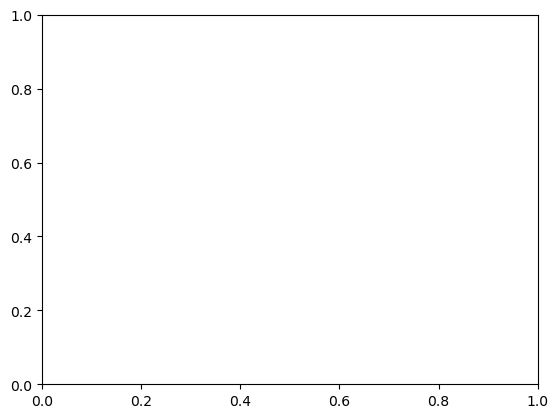

In [45]:
T = 16
s1 = np.zeros(4096)
abscise = range(8*len(s1)//1024-7)
s1[0:3072] = np.sin(2*np.pi*200*np.array(range(3072))/1024)
s1[3072:] = np.sin(2*np.pi*150*np.array(range(1024))/1024)
Spec,Phase = Analyse(s1)
plt.pcolormesh((abscise,Spec))


 <u>**1.3 Synthèse du son**</u>
 Ecrire une fonction Synthese qui prend en entrée deux tableaux, un de module Spec et un de phase Phase et qui renvoie un vecteur Srec. La première ligne du programme est
 <br> def synthese(Spec,Phase):
***Remarques***
- Il est plus facile de partir d’un vecteur Srec nul et d’y ajouter chaque fenêtre que de parcourir les points un à un et de sommer les contributions des 8 fenêtres associées au point.
- On n’oubliera pas de fenêtrer avec une fenêtre de Hanning, les trames reconstruites.
- Ceprogramme peut également être écrit en moins de 15 lignes.
 <u>**1.4 Interpolation du spectre**</u>
<br> Ecrire une fonction InterpSpec qui prend en entrée, un spectrogramme Spec et un vecteur colonne T contenant les “indices réels” des nouvelles fenêtres à construire et qui renvoie le tableau Spec2 du spectrogamme interpolé. Les valeurs de T doivent varier entre 1 et Nf 1. La première ligne du programme est
 <br>*def InterpSpec(Spec,T):*
 ***Remarques***
- Lenombre de fenêtres de Spec2 est égal à la longueur de T
- Lacolonne d’indice k de Spec2 correspond à la colonne d’indice réel T(k) de Spec. Elle se calcule à partir des colonnes de Spec d’indices floor(T(k)) et floor(T(k)) + 1.
 <u> **1.5 Calcul de la phase**</u>
 <br> Ecrire un programme InterpPhase qui prend en entrée un tableau de phase Phase et un vecteur T contenant es indices "réels" des nouvelles fenêtre et qui renvoie le tableau de phase Phase2 associé à ce jeu de fenêtre.
 <br> La première ligne du programme est
 <br>*def InterpPhase(Phase,T):*
 <br> Le calcul de la phase est le point le plus délicat du vocoder de phase. Pour que le son reconstruit soit le plus fidèle possible au son original, la phase associée à chaque fréquence doit varier à la même vitesse que sur le son original.
 <br> Comme dans le programme précédent, la colonne d’indice k de Phase2 correspond à la colonne d’indice réel T(k) dans le tableau Phase. Cette colonne Phase2(:;k) doit être construite de telle sorte que la variation de phase locale entre les deux tableaux soit proche :
 <br>Phase2(:;k) Phase2(:;k 1) = Phase(:;floor(T(k))) Phase(:;floor(T(k)) 1)
 <u>**1.6 Le Vocoder**</u>
 <br> On appellera par exemple Vocoder la fonction principale. Elle prend en entrée un fichier .wav et un facteur de dilatation alpha.
 - On analyse le son grâce à la fonction Analyse.
 - Oncrée un vecteur T qui contiendra les "indices réels" des fenêtres associées au signal reconstruit.
 T= [1:alpha:Nf-1];
 - Oninterpole le spectre et on calcule la phase avec les fonctions InterpSpec et InterpPhase.
 - Onreconstruit le son avec la fonction Synthese .
 - On crée un fichier .wav associé au vecteur reconstruit avec la fonction wv.write

### 2 Séparation de sources
- Le but de cette section est de séparer différentes sources à partir d’un enregistrement stéréophonique en exploitant les différences d’intensités des différentes sources entre les deux voix. Cette différence entre les voix peut être due par exemple aux différentes positions des instruments au moment de l’enregistrement si l’on suppose que chacune des voix est acquise par deux micros placés à des endroits différents.
- Nous travaillerons sur des données mélangées artificiellement sans ajouts d’effets comme la réverberation. On parle de mélange instantané. Nous allons utiliser le spectrogramme vu lors du précédent TP.
- On dispose de données stéréophoniques qui seront représentées sous python par une matrice S comportant deux lignes et NS colonnes. On considère que chacune des voix est une combinaison linéaire de pistes monointrumentales avec des coefficients différents. On peut ainsi voir S comme le produit d’une matrice de mélange M de taille 2n par une P de taille nNS contenant les n pistes instrumentales. Si n = 2 et qu’on connait la matrice M il est aisé d’effectuer la séparation juste par inversion de la matrice M.  - - Notre but ici est de développer une méthode fonctionnant sans connaissance de M et avec plus de deux sources. Néanmoins pour commencer nous supposerons que M est connue et nous utiliserons deux sources avant de passer à trois.
- Pour ce faire nous supposerons qu’à chaque instant les différents instruments jouent à des fréquences différentes.
- Pour chaque fréquence instantanée, nous allons comparer les deux voies et en fonction du rapport d’intensité entre les deux voix attribuer la fréquence instantanée l’un ou l’autre des instruments.

In [67]:
def calc_hanning(m,n):
    return .5*(1 - np.cos(2*np.pi*np.linspace(1,m,m)/(n+1))) 

def hanning(n):
    if (n%2) == 0:
        # Even length window
        half = n//2
        w = calc_hanning(half,n)
        w = np.concatenate((w,w[::-1]))
    else:
        # Odd length window
        half = (n+1)//2
        w = calc_hanning(half,n)
        z=w[::-1]
        w = np.concatenate((w,z[1:]))
    return w
def InterpSpec(Spec,T):
    N=Spec.shape[0]
    Nf2=T.shape[0]
    Spec2=np.zeros((N,Nf2))
    for k in range(Nf2):
        t=T[k]
        indice1=int(np.floor(t))
        alpha=t-indice1
        Spec2[:,k]=(1-alpha)*Spec[:,indice1]+alpha*Spec[:,indice1+1]
    return Spec2

def Synthese(Spec,Phase):
    N=Spec.shape[0]
    Nf=Spec.shape[1]
    Srec=np.zeros((Nf+7)*N//8)
    H=hanning(N)
    for k in range(Nf):
        ftemp=Spec[:,k]*np.exp(1j*Phase[:,k])
        temp=np.real(fft.ifft(ftemp))
        Srec[k*N//8:(k+8)*N//8]=Srec[k*N//8:(k+8)*N//8]+H*temp
    Srec=Srec/4
    return Srec

def InterpPhase(Phase,T):
    N=Phase.shape[0]
    Nf2=T.shape[0]
    Phase2=np.zeros((N,Nf2))
    t0=T[0]
    indice1=int(np.floor(t0))
    Phase2[:,0]=Phase[:,indice1]
    for k in range(1,Nf2):
        t=T[k]
        indice1=int(np.floor(t))
        dphase=Phase[:,indice1+1]-Phase[:,indice1]
        Phase2[:,k]=Phase2[:,k-1]+dphase
    return Phase2


 ### 2.1 Séparation avec Matrice de mélange connue
 **2.1.1 Deux instruments**
 1. A l’aide de la commande wv.read charger les deux sons Mix11.wav et Mix21.wav dans deux vecteurs Smix11 et Smix21.
 Ces deux mélanges ont été obtenus à partir de deux sources S1 et S2 en faisant :
 Smix11 = S1/3 + 2S2/3 et Smix12 = 2S1/3 + S2/3.
 2. Calculer et visualiser les spectrogrammes ainsi que les tableaux de phases de Smix11 et Smix21 à l’aide
 des programmes effectués lors du TP 2. On prendra un recouvrement de 7/8 de fenêtre et des fenêtres de 2000 points.
 3. Ecrire un programme Separation
 <br>*def Separation(Spec1,Spec2,T):*
 <br>qui prend en entrée les deux spectrogrammes Spec1 et Spec2 et qui renvoie deux spectrogrammes Spec3
 et Spec4 tels que Spec4(i;j) = Spec1(i;j) si Spec1(i;j) >= T*Spec2(i;j) et Spec3(i;j) = Spec2(i;j) sinon.
 On pourra se contenter de traiter la moitié basse des basses fréquences si on veut limiter le temps de
 calcul.
 4. Quelle valeur de T vous semble pertinente pour ce mélange particulier?
 5. Ecrire une fonction qui en fonction des paramètres du mélange vous donne une valeur raisonnable de T.
 6. Ecrire un programme qui reconstruit les signaux séparés à partir de Spec3 et Spec4 et des tableaux de phases. Tester les deux tableaux de phases. Que pensez vous?
 7. Comme on connait les coefficients utilisés dans le mélange, peut-on réaliser une séparation parfaite dans ce cas? Comment?
 

In [62]:
import scipy.io.wavfile as wv
Freq1, Signal1 = wv.read('Mix11.wav')
Freq2, Signal2 = wv.read('Mix21.wav')

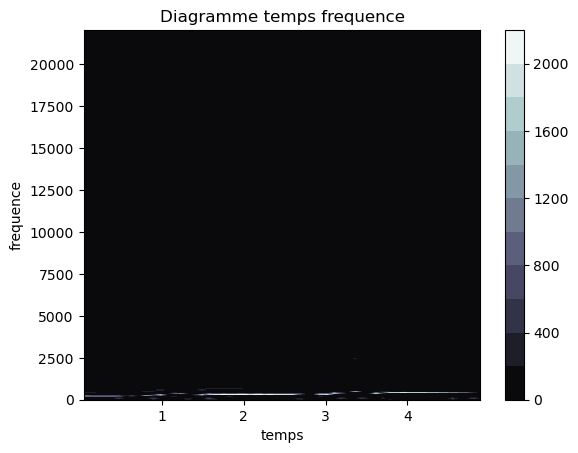

In [60]:
FeSon=Freq
s=Signal
N=len(s)
p=2000#demi-largeur de fenêtre
n=int(p*7/8) #recouvrement temporel
T=2.*p/FeSon #Largeur temporelle de la fenêtre
F=np.arange(p)/T #Vecteur des fréquences observées
#t=[] #vecteur des temps
S=np.zeros(p) #matrice des coefficients de Fourier: 
    #on ne prend que la première moitié des coefficients, le signal étant réel
w=np.hanning(2*p) #déclaration de la fenêtre: fenetre de Hanning
#w=np.hamming(2*p) #

#Calcul du spectrogramme
for k in np.arange(p+1,N-p+1,n+p):
    #t=np.hstack((t,[k/Fe])) #construction du vecteur temps
    xw=w*s[k-p:k+p] #produit de la fenetre avec le signal
    yw=fft.fft(xw)/len(xw) # transformée de Fourier
    S=np.vstack((S,np.abs(yw[:p])))
    
#Représentation du spectrogramme    
t=np.arange(p+1,N-p+1,n+p)/FeSon
X,Y=np.meshgrid(t,F)      
Z=S[1:,]


CS=plt.contourf(X,Y,Z.T,10,cmap=plt.cm.bone)
cbar=plt.colorbar(CS)

plt.xlabel('temps')
plt.ylabel('frequence')
plt.title('Diagramme temps frequence')
plt.show()

In [65]:
def Separation(Spec1,Spec2,Phase1,Phase2,T):
    Spec3 = np.zeros(Spec1.shape)
    Spec4 = np.zeros(Spec2.shape)
    Phase3 = np.zeros(Spec2.shape)
    Phase4 = np.zeros(Spec2.shape)
    for i in range(Spec1.shape[0]):
        for j in range(Spec1.shape[1]):
            if Spec1[i,j]>=T*Spec2[i,j]:
                Spec4[i,j] = Spec1[i,j]
                Phase4[i,j] = Phase1[i,j]
            else:
                Spec3[i,j] = Spec2[i,j]
                Phase3[i,j] = Phase2[i,j]
    return Spec3,Spec4,Phase3,Phase4

In [68]:
Spec1,Phase1 = Analyse(Signal1)
Spec2,Phase2 = Analyse(Signal2)
Spec3,Spec4,Phase3,Phase4 = Separation(Spec1,Spec2,Phase1,Phase2,1)
Signal3 = Synthese(Spec3,Phase3)
wv.write("Essai-Vocoder3.wav",Freq1,Signal3)
Signal4 = Synthese(Spec4,Phase4)
wv.write("Essai-Vocoder4.wav",Freq1,Signal4)

<br>**2.1.2 Trois instruments (pour aller plus loin)**
 8. Charger les mélanges Mix12.wav et Mix22.wav. On a ici
 Smix12 = 0:4 S1+0:2 S2+0:8 S3 et Smix22=0:6 S1+0:8 S2+0:2 S3
 9. Calculer et visualiser les tableaux de phases de Smix12 et Smix22.
 10. Ecrire un programme Separation2
 def Separation2(Spec1,Spec2,T):
 qui renvoie 3 spectrogrammes et où T est un vecteur à 2 composantes qui va séparer en 3 les deux spectro
grammes en attribuant les fréquences instantanées en fonctions des rapports des fréquences instantanées
 de Spec1 et Spec2.
 11. Ecrire un programme qui estime des valeurs raisonables de T(1) et T(2) en fonction des paramètres du
 mélange.
 12. Reconstruire les trois sons à partir de Spec3, Spec4 et Spec5 et des tableaux de phases.
 13. De même avec 4 sons si vous avez le courage.
 3
2.2 Estimation de la matrice de mélange (pour aller plus loin)
 Supposons maintenant que la matrice de mélange soit inconnue. Comment faire?
 14. Ecrire un programme
 def vectoriser(Spec1,Spec2,N):
 qui prend en entrée deux spectrogrammes et un entier N qui renvoie un vecteur S de taille 2 N contenant
 les pairs d’intensités les plus energétiques des spectrogrammes. Ce programme doit aussi afficher sous
 forme de nuage de point ces différentes paires.
 On peut espérer que ces points seront principalement alignés le long de n droites où n est le nombre de
 sources.
 15. Tester le programme précédent sur les deux jeux de mélanges utilisés.
 16. Comment interpréter ces droites? A quoi correspond un point sur une des droites? A quoi correspond
 un point en dehors de ces droites? Comment sont liés les coefficients directeurs de ces droites et les
 coefficients du mélange?
 17. Ecrire un programme
 def Direction(S,nbinstru):
 qui à partir de S et d’un nombre nbinstru d’instruments renvoie une estimation des coefficients de
 mélange. On pourra calculer les N rapports d’intensités et utiliser les pics de l’histogramme de ces
 rapports.
 18. Ecrire un programme qui à partir de deux mélanges et d’un nombre d’instruments, reconstruit les fichiers
 wav des différentes sources.